### **Hard Margin Case**

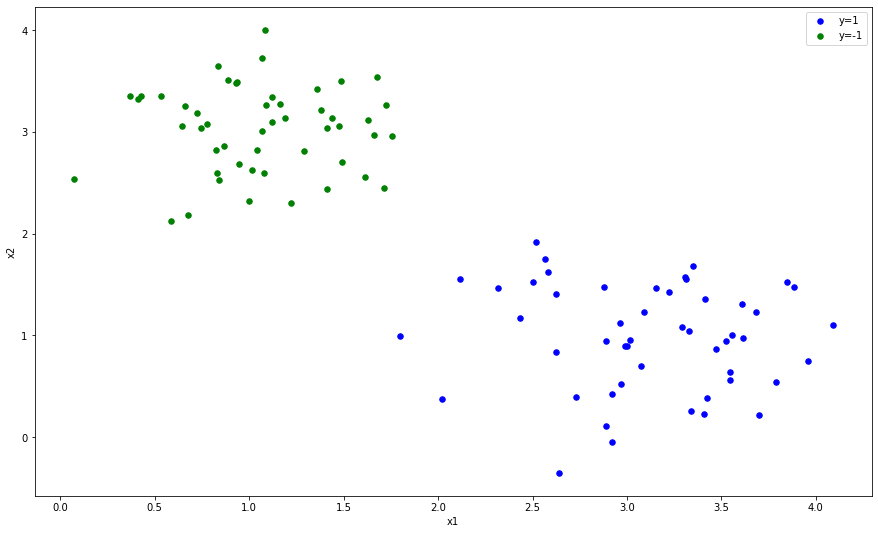

In [0]:
import numpy as np
import csv
import cvxopt
from numpy import genfromtxt
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
import heapq

plt.figure(figsize = (15,9))


X = np.genfromtxt("X.csv",delimiter=",")
y = np.genfromtxt("y.csv",delimiter=",")

idx_1 = np.where(y == 1)
idx_2 = np.where(y == -1)

plt.scatter(X[idx_1,0], X[idx_1,1], s=30, c='b', marker="o", label="y=1")
plt.scatter(X[idx_2,0], X[idx_2,1], s=30, c='g', marker="o", label="y=-1")

plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().legend()
plt.show()


In [0]:
def linear_svm(X,y):
    solvers.options['show_progress'] = False

    N = X.shape[0]
    F = X.shape[1]

    Q = np.zeros((F+1,F+1))

    for row in range(Q.shape[0]):
      for col in range(Q.shape[1]):
          if row == 0 or col == 0: 
              Q[row,col] = 0
          elif row == col: 
              Q[row,col] = 1
          else: 
              Q[row,col] = 0
        
    P = cvxopt.matrix(Q)
    q = cvxopt.matrix(np.zeros(F+1))

    emptyList = []

    for n in range(N):
        zeroMatrix = np.zeros((F+1))
        for index,value in enumerate(zeroMatrix):
            if index == 0: 
                zeroMatrix[index] = 1
            else: 
                zeroMatrix[index] = X[n].T[index-1]
        emptyList.append(y[n]*zeroMatrix)

    npEmptyList = np.asarray(emptyList) * -1
    G = cvxopt.matrix(npEmptyList)
    h = cvxopt.matrix(np.ones(N)*-1)
    QPsol = cvxopt.solvers.qp(P,q,G,h)
    alphas = np.array(QPsol["x"])
    return QPsol, alphas
  
QPSol, alphas = linear_svm(X,y)
print("Alpha Values:",alphas[0],alphas[1],alphas[2])
print("QP Solution Values:",QPSol)


Alpha Values: [0.46118099] [1.42189318] [-1.58830104]
QP Solution Values: {'x': <3x1 matrix, tc='d'>, 'y': <0x1 matrix, tc='d'>, 's': <100x1 matrix, tc='d'>, 'z': <100x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 3.9831961345171e-08, 'relative gap': 1.752982005305458e-08, 'primal objective': 2.2722402117323757, 'dual objective': 2.272240172723864, 'primal infeasibility': 1.8119735781362242e-10, 'dual infeasibility': 2.177613049267418e-08, 'primal slack': 5.886863079444381e-11, 'dual slack': 2.59735817141305e-11, 'iterations': 6}


### **Plotting Decision Boundary**

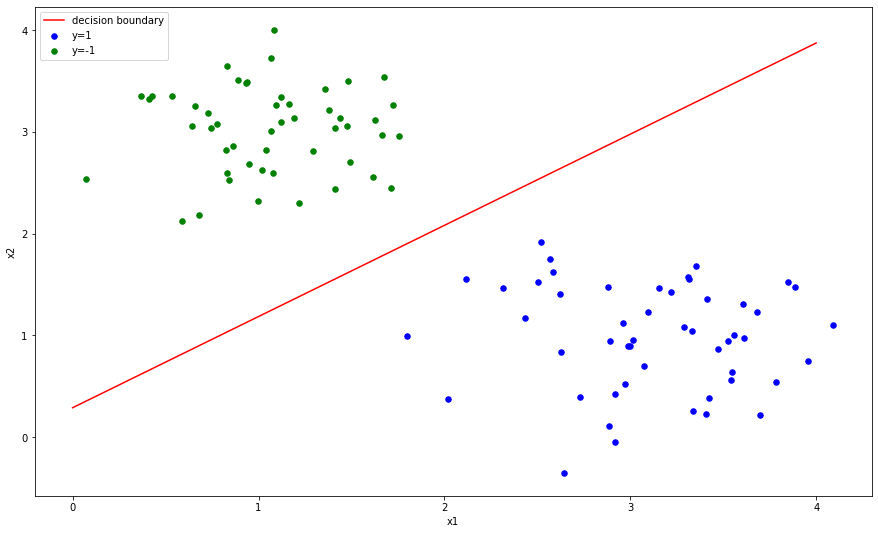

In [0]:
def plot_data_with_decision_boundary(X, y, alphas, fig_size, labels=['x1', 'x2']):
    
    plt.figure(figsize = fig_size)

    idx_1 = np.where(y == 1)
    idx_2 = np.where(y == -1)

    x = np.arange(0,5)

    plt.scatter(X[idx_1,0], X[idx_1,1], s=30, c='b', marker="o", label="y=1")
    plt.scatter(X[idx_2,0], X[idx_2,1], s=30, c='g', marker="o", label="y=-1")

    decisionBoundarySlope = -alphas[1]/alphas[2]
    decisionBoundaryIntercept = -alphas[0]/alphas[2]
    
    plt.plot(x,x*decisionBoundarySlope + decisionBoundaryIntercept, "r", label="decision boundary")

    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
 
    plt.gca().legend()

plot_data_with_decision_boundary(X,y,alphas,(15,9),labels=["x1","x2"])


In [0]:
print("The decision boundary above has equation: f(x) =",-alphas[1]/alphas[2],"* x +", -alphas[0]/alphas[2])
print("Gradient:",-alphas[1]/alphas[2])
print("Intercept:",-alphas[0]/alphas[2])

The decision boundary above has equation: f(x) = [0.89522902] * x + [0.29036119]
Gradient: [0.89522902]
Intercept: [0.29036119]


In [0]:
def distance(x):
    decisionBoundarySlope = -alphas[1]/alphas[2]
    decisionBoundaryIntercept = -alphas[0]/alphas[2]

    pointATemp = decisionBoundarySlope * 2 + decisionBoundaryIntercept
    pointBTemp = decisionBoundarySlope * 3 + decisionBoundaryIntercept

    pointA,pointB = np.array([2, pointATemp[0]]),np.array([3, pointBTemp[0]])
    distanceVal = np.linalg.norm(np.cross(pointB-pointA, pointA-x))/np.linalg.norm(pointB-pointA)

    return distanceVal

distanceValues = [] 

for i in range(X.shape[0]):
    distanceValues.append([distance(X[i]),X[i],i])
    
heapq.heapify(distanceValues)

In [0]:
print("The points closest to the decision boundary:\n")
print("Point:",distanceValues[0][1],", Distance:",distanceValues[0][0])
print("Point:",distanceValues[1][1],", Distance:",distanceValues[1][0])
print("Point:",distanceValues[2][1],", Distance:",distanceValues[2][0])
print("Point:",distanceValues[3][1],", Distance:",distanceValues[3][0])
print("Point:",distanceValues[4][1],", Distance:",distanceValues[4][0])


The points closest to the decision boundary:

Point: [1.71138733 2.45204836] , Distance: 0.4690918434130657
Point: [2.56588054 1.74739173] , Distance: 0.6258646402543528
Point: [2.51879639 1.91565724] , Distance: 0.46909184430848594
Point: [1.41010586 2.44024273] , Distance: 0.6612502393871535
Point: [2.31525388 1.46101804] , Distance: 0.672062356633359


SVM provides an optimal  hyperplane that maximises the distance between the two classes on the training data. 

The fprimal(x) function is used to predict the label of different coordinates. 


In [1]:
def f_primal(x): 
    wCoefficeints, bVal = [alphas[1], alphas[2]], alphas[2]
    yVal = np.dot(x,wCoefficeints) + bVal
    if yVal > 0:
      return 1
    else:
      return -1

fPrimalOne = f_primal((3.0,1.5))
fPrimalTwo = f_primal((1.2,3.0))

print ("(3.0,1.5) has label prediction:",fPrimalOne)
print ("(1.2,3.0) has label prediction:", fPrimalTwo)

NameError: ignored